In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]
from statsmodels.distributions.empirical_distribution import ECDF
import random
from random import seed
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import string
import scipy.stats as stats

In [483]:
#load csv
S = pd.read_csv("Sunspots2011to2015.csv")

In [345]:
S.head()

,Year,Month,Day,Date,Daily_Sunspot_Number,States
0,2011,1,1,1/1/2011,48,1
1,2011,1,2,1/2/2011,48,1
2,2011,1,3,1/3/2011,47,1
3,2011,1,4,1/4/2011,48,1
4,2011,1,5,1/5/2011,36,1


In [270]:
print(S["Daily_Sunspot_Number"].describe())
print(S["Daily_Sunspot_Number"].median())
print(S["Daily_Sunspot_Number"].mode())

count    1826.000000
mean       88.510405
std        39.832982
min         0.000000
25%        58.000000
50%        85.000000
75%       116.000000
max       220.000000
Name: Daily_Sunspot_Number, dtype: float64
85.0
0    78
dtype: int64


In [346]:
print(S["States"].describe())
print(S["States"].median())
print(S["States"].mode())

count    1826.000000
mean        2.463308
std         1.358493
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: States, dtype: float64
2.0
0    2
dtype: int64


<AxesSubplot:title={'center':'Daily Number of Sunspots (2011 to 2015)'}, xlabel='Date'>

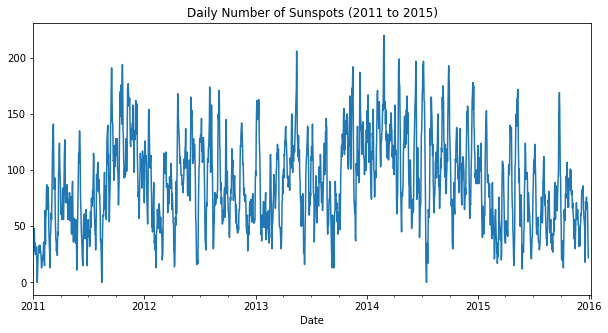

In [291]:
#Time series plot
series = pd.read_csv('Sunspot_series.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(title='Daily Number of Sunspots (2011 to 2015)', label='Number of Sunspots')

<AxesSubplot:title={'center':'Fraction of time spent in each State'}, xlabel='States'>

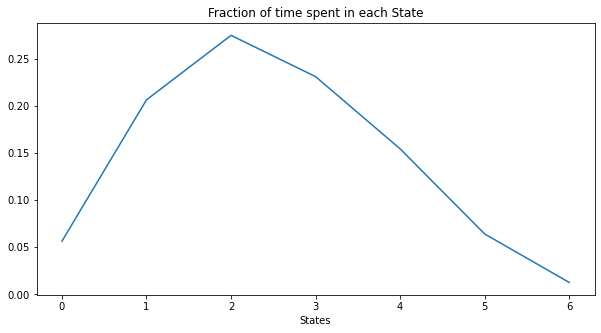

In [347]:
#Empirical Distribution
y = S['States'].value_counts(normalize=True)
z = y.sort_index(axis=0)
z.plot(title='Fraction of time spent in each State', xlabel='States')

<AxesSubplot:title={'center':'Plot of Markov States'}, xlabel='Year', ylabel='States'>

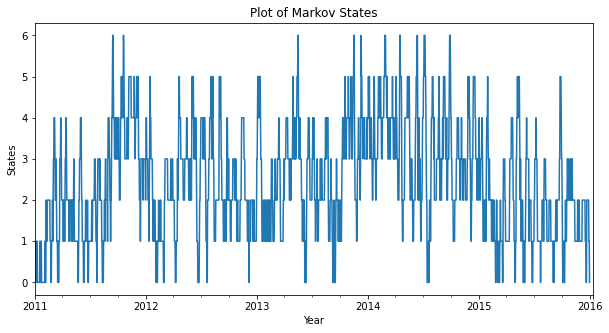

In [295]:
#Plot of States
series = pd.read_csv('States_series.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series.plot(title='Plot of Markov States', xlabel='Year', ylabel='States')

In [429]:
#Transition Matrix
states = np.array(S['States'])
def TransitionMatrix(states):
    pd.value_counts(states)
    y = len(pd.unique(states))
    P = np.zeros([y,y])
    
    for i in range(y):
        for j in range(y):
            for x in range(len(states)-1):
                if states[x] == i and states[x+1] == j:
                    P[i][j] += 1

    for row in P:
        s = sum(row)
        if s > 0:
            row[:] = [round(f/s,3) for f in row]
    return P
P = TransitionMatrix(states)
P

array([[0.598, 0.343, 0.059, 0.   , 0.   , 0.   , 0.   ],
       [0.106, 0.658, 0.225, 0.011, 0.   , 0.   , 0.   ],
       [0.004, 0.183, 0.641, 0.167, 0.004, 0.   , 0.   ],
       [0.   , 0.002, 0.199, 0.602, 0.194, 0.002, 0.   ],
       [0.   , 0.   , 0.018, 0.28 , 0.521, 0.17 , 0.011],
       [0.   , 0.   , 0.   , 0.009, 0.41 , 0.521, 0.06 ],
       [0.   , 0.   , 0.   , 0.   , 0.13 , 0.304, 0.565]])

In [328]:
#Stationary Distribution
def StationaryDistribution(P):
    A = P.T-np.identity(P.shape[0])
    A = np.vstack([A,np.ones((P.shape[0]))])
    b = np.zeros((P.shape[0])).T
    b = np.zeros((P.shape[0]+1,1))
    b[-1] = 1
    W = np.linalg.lstsq(A,b,rcond=None)[0]
    return W
W = StationaryDistribution(P)
W

array([[0.05716349],
       [0.2057347 ],
       [0.27441411],
       [0.23114188],
       [0.15447496],
       [0.06414652],
       [0.01292431]])

<AxesSubplot:title={'center':'Plot of Stationary Distribution'}, xlabel='States'>

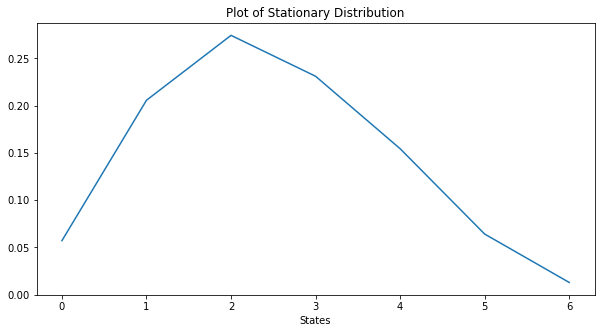

In [357]:
#Plot of stationary distribution
series = pd.Series(W.flatten()) 
series.plot(title='Plot of Stationary Distribution',xlabel='States')

In [182]:
#Markov chain simulation
def SimulateSeries(P,k):
    A = np.zeros(k, dtype=int)
    A[0] = random.choice(range(8))
for t in range(999):
    x = round(random.uniform(0,1),2)
    arr = P_dist[A[t]]
    A[t+1] = min([i for i, e in enumerate(arr) if e >= x])
A    

array([2, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 3, 2, 2, 3, 3, 3, 3, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 4, 4, 3, 3, 2, 3,
       4, 4, 3, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2,
       2, 3, 4, 5, 4, 3, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 1, 1, 2,
       2, 2, 2, 3, 4, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 5, 5, 5,
       5, 4, 4, 2, 1, 1, 1, 1, 1, 1, 2, 3, 3, 3, 3, 4, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 4, 5, 5, 5, 4, 4, 3, 2, 3, 3, 3, 3, 4, 4, 3, 4, 4, 4, 4,
       4, 3, 0, 1, 2, 2, 2, 3, 2, 3, 4, 4, 5, 4, 5, 4, 4, 3, 2, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 3, 4, 4,
       5, 4, 4, 4, 4, 3, 2, 2, 3, 3, 4, 4, 4, 4, 3, 3, 2, 3, 3, 3, 3, 3,
       2, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 3, 3, 4, 4, 3, 4,
       4, 3, 3, 3, 2, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1,

In [ ]:
#Time series simulation
def SimulateSeries(P,k):
    P_dist = [np.cumsum(P[i, :]) for i in range(P.shape[0])]
    A = np.zeros(k, dtype=int)
    A[0] = random.choice(range(P.shape[0]))
    for t in range(k-1):
        x = round(random.uniform(0,1),2)
        arr = P_dist[A[t]]
        A[t+1] = min([i for i, e in enumerate(arr) if e >= x])
    return A
A    

In [438]:
def TransitionMatrix(states):
    pd.value_counts(states)
    y = len(pd.unique(states))
    P = np.zeros([y,y])
    
    for i in range(y):
        for j in range(y):
            for x in range(len(states)-1):
                if states[x] == i and states[x+1] == j:
                    P[i][j] += 1

    for row in P:
        s = sum(row)
        if s > 0:
            row[:] = [f/s for f in row]
    return P
D = TransitionMatrix(states)
P_dist = [np.cumsum(D[i, :]) for i in range(D.shape[0])]
A = np.zeros(1000, dtype=int)

In [441]:
P_dist

[array([0.59803922, 0.94117647, 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 array([0.1061008 , 0.76392573, 0.98938992, 1.        , 1.        ,
        1.        , 1.        ]),
 array([0.00398406, 0.187251  , 0.82868526, 0.99601594, 1.        ,
        1.        , 1.        ]),
 array([0.        , 0.00236967, 0.2014218 , 0.80331754, 0.99763033,
        1.        , 1.        ]),
 array([0.        , 0.        , 0.0177305 , 0.29787234, 0.81914894,
        0.9893617 , 1.        ]),
 array([0.        , 0.        , 0.        , 0.00854701, 0.41880342,
        0.94017094, 1.        ]),
 array([0.        , 0.        , 0.        , 0.        , 0.13043478,
        0.43478261, 1.        ])]

In [460]:
A = np.zeros(1000, dtype=int)
A[0] = random.choice(range(P.shape[0]))
for t in range(999):
    x = round(random.uniform(0,0.95),2)
    print(x)
    arr = P_dist[A[t]]
    print(arr)
    A[t+1] = min([i for i, e in enumerate(arr) if e >= x])
    print([i for i, e in enumerate(arr) if e >= x])
    print(min([i for i, e in enumerate(arr) if e >= x]))

0.72
[0.         0.         0.         0.         0.13043478 0.43478261
 1.        ]
[6]
6
0.74
[0.         0.         0.         0.         0.13043478 0.43478261
 1.        ]
[6]
6
0.39
[0.         0.         0.         0.         0.13043478 0.43478261
 1.        ]
[5, 6]
5
0.41
[0.         0.         0.         0.00854701 0.41880342 0.94017094
 1.        ]
[4, 5, 6]
4
0.41
[0.         0.         0.0177305  0.29787234 0.81914894 0.9893617
 1.        ]
[4, 5, 6]
4
0.51
[0.         0.         0.0177305  0.29787234 0.81914894 0.9893617
 1.        ]
[4, 5, 6]
4
0.27
[0.         0.         0.0177305  0.29787234 0.81914894 0.9893617
 1.        ]
[3, 4, 5, 6]
3
0.02
[0.         0.00236967 0.2014218  0.80331754 0.99763033 1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.02
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.44
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.73
[0.1061008  0.76392573 0.98938992 1.    

 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.16
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.39
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.65
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.78
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.24
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.55
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.81
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.3
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.44
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.44
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.4
[0.0

[1, 2, 3, 4, 5, 6]
1
0.46
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.13
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.78
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.57
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.38
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.37
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.43
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.18
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.89
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.21
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.24
[0.00398406 0.1

 1.        ]
[2, 3, 4, 5, 6]
2
0.72
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.29
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.55
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.67
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.43
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.2
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.0
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.73
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.18
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.37
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.36
[

[2, 3, 4, 5, 6]
2
0.58
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.24
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.11
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.67
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.06
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.48
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.56
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.36
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.1
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.57
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4,

0.45
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.13
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.62
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.81
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.53
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.28
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.8
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.76
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.68
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.8
[0.00398406 0.187251   0.82868526 0.99601594 1.         1.
 1.        ]
[2, 3, 4, 5, 6]
2
0.79
[0.00398406 0.187251   0.82868526 0.99

0
0.42
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.71
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.19
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.02
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.45
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.43
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.24
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.86
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.5
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.36
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.43

 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.75
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.42
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.67
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.13
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[1, 2, 3, 4, 5, 6]
1
0.09
[0.1061008  0.76392573 0.98938992 1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.4
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.37
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.16
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.24
[0.59803922 0.94117647 1.         1.         1.         1.
 1.        ]
[0, 1, 2, 3, 4, 5, 6]
0
0.04
[0.59803922 0.94117647 1.         1.         1.         1.
 1.   

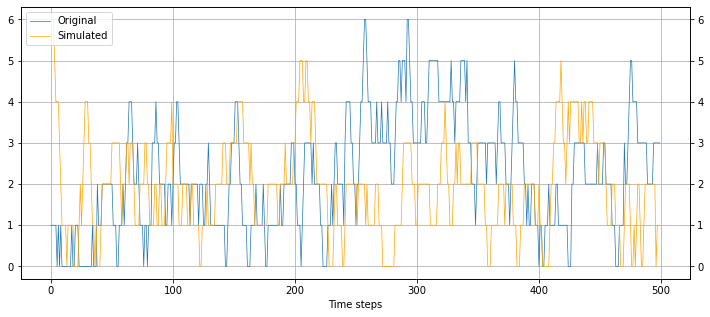

In [464]:
ts1 = pd.Series(states[0:500].flatten(),index=range(500))
ts2 = pd.Series(A[0:500].flatten(), index=range(500))

plt.figure(figsize=(12,5))
plt.xlabel('Time steps')
#plt.ylabel('States')

ax1 = ts1.plot(grid=True, label='Original', lw = 0.7)
ax2 = ts2.plot(color='Orange', grid=True, secondary_y=True, label='Simulated', lw = 0.7)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

In [417]:
#Autocorrelation Comparison
def Autocorrelation(X,k):
    X_b = np.average(X)
    n, d = 0, 0
    for i in range(0,len(X) - k):
        n += ((X[i] - X_b)*(X[i+k] - X_b))
    for i in range(0,len(X)):
        d += (X[i] - X_b)**2

    return n/d

In [484]:
states = np.array(S['States'])

In [485]:
ACF1, ACF2 = np.zeros(100), np.zeros(100)
for i in range(len(ACF1)):
    ACF1[i] = Autocorrelation(states,i)
    ACF2[i] = Autocorrelation(A,i)

In [ ]:
#import statsmodels
#statsmodels.graphics.tsaplots.plot_acf(ts1,lags=range(500))

In [493]:
df = pd.concat([ts1, ts2], axis=1)
df.corr(method='pearson')

,0,1
0,1.000000,0.783877
1,0.783877,1.000000


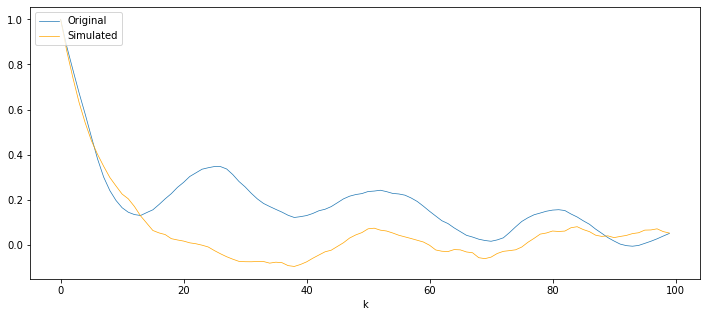

In [488]:
ts1 = pd.Series(ACF1.flatten(),index=range(100))
ts2 = pd.Series(ACF2.flatten(), index=range(100))

plt.figure(figsize=(12,5))
plt.xlabel('k')
#plt.ylabel('ACF')

ax1 = ts1.plot(grid=True, label='Original', lw = 0.7)
ax2 = ts2.plot(color='Orange', grid=False, secondary_y=False, label='Simulated', lw = 0.7)

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1, l1, loc=2)
plt.show()

In [517]:
#Calculating two step Transition Frequencies
def TwoStepFrequency(states):
    pd.value_counts(states)
    y = len(pd.unique(states))
    P = np.zeros([y,y])
    
    for i in range(y):
        for j in range(y):
            for x in range(len(states)-2):
                if states[x] == i and states[x+2] == j:
                    P[i][j] += 1

    for row in P:
        s = sum(row)
        if s > 0:
            row[:] = [round(f/1,3) for f in row]
    return P
N = TwoStepFrequency(states)
N

array([[ 40.,  45.,  16.,   1.,   0.,   0.,   0.],
       [ 57., 192., 104.,  22.,   1.,   0.,   0.],
       [  6., 122., 250., 104.,  18.,   2.,   0.],
       [  0.,  15., 112., 184.,  95.,  14.,   2.],
       [  0.,   1.,  18.,  93., 115.,  51.,   4.],
       [  0.,   0.,   1.,  17.,  46.,  40.,  13.],
       [  0.,   0.,   1.,   1.,   7.,  10.,   4.]])

In [500]:
#Two step Transition Frequencies using Transition Matrix
Q = np.round(np.linalg.matrix_power(P, 2),3)
Q    

array([[0.394, 0.442, 0.15 , 0.014, 0.   , 0.   , 0.   ],
       [0.134, 0.511, 0.301, 0.051, 0.003, 0.   , 0.   ],
       [0.024, 0.239, 0.486, 0.211, 0.037, 0.001, 0.   ],
       [0.001, 0.039, 0.251, 0.45 , 0.219, 0.035, 0.002],
       [0.   , 0.004, 0.077, 0.319, 0.397, 0.181, 0.022],
       [0.   , 0.   , 0.009, 0.125, 0.437, 0.359, 0.07 ],
       [0.   , 0.   , 0.002, 0.039, 0.266, 0.352, 0.339]])

In [234]:
n = np.zeros(N.shape[0])
for i in range(N.shape[0]):
    for j in range(N.shape[0]): 
        n[i] += N[i][j] 
    

In [529]:
#GoodnessofFit
n = 0
TS = np.zeros((N.shape[0]))
chi2 = np.zeros(N.shape[0])
p_value = np.zeros(N.shape[0])
for i in range(N.shape[0]):
    N1 = N[i][Q[i]>0]
    n = N1.sum()
    chi2[i] = stats.chi2.ppf(q = 0.95, df = len(N1) - 1)
    for j in range(N.shape[0]):
        if Q[i][j] > 0:
            O = N[i][j]
            E = n * Q[i][j]
            TS[i] += ((O - E)**2 / E)

In [519]:
TS

array([ 0.16134223,  2.04322628,  7.74180465,  2.77885214,  1.61853161,
        3.82330428, 22.22096092])

In [520]:
chi2

array([ 7.8147279 ,  9.48772904, 11.07049769, 12.59158724, 11.07049769,
        9.48772904,  9.48772904])